In [1]:
%load_ext autoreload
%autoreload 2

In [86]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from gpt3forchem.data import get_bandgap_data

import matplotlib.pyplot as plt
from gpt3forchem.output import get_regression_metrics
import numpy as np
plt.style.use(['science', 'nature'])

/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/gpflow/experimental/utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.decorator.check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/gpflow/experimental/utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.inheritance.inherit_check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(


In [12]:
data = get_bandgap_data()

In [69]:
data_grouped_by_smiles =  data.groupby('smiles').agg(['mean', 'std', 'min', 'max'])

/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_44792/1751295308.py:1: FutureWarning: ['chembl_id', 'conf_id', 'selfies'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data_grouped_by_smiles =  data.groupby('smiles').agg(['mean', 'std', 'min', 'max'])


/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GFN2_HOMO_LUMO_GAP', ylabel='Density'>

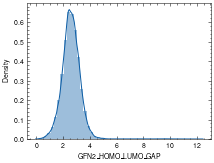

In [14]:
sns.distplot(data_grouped_by_smiles['GFN2_HOMO_LUMO_GAP']* 27.2114)

In [6]:
data_grouped_by_smiles

,mw,atoms,heavy_atoms,heteroatoms,rotatable_bonds,stereocenters,rings,hbond_acceptors,hbond_donors,significant_negative_wavenumbers,...,DFT_ROT_CONSTANT_A,DFT_ROT_CONSTANT_B,DFT_ROT_CONSTANT_C,DFT_XC_ENERGY,DFT_NUCLEAR_REPULSION_ENERGY,DFT_ONE_ELECTRON_ENERGY,DFT_TWO_ELECTRON_ENERGY,DFT_HOMO_ENERGY,DFT_LUMO_ENERGY,DFT_HOMO_LUMO_GAP
smiles,,,,,,,,,,,,,,,,,,,,,
ClC(Cl)(Cl)Cl,151.875411,5.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.057796,0.057774,0.057755,-86.472489,439.716519,-3468.214852,1236.729520,-0.398327,0.038182,0.436509
Clc1c(Cl)c(Cl)c2c(c1Cl)Oc1c(Cl)c(Cl)c(Cl)c(Cl)c1O2,455.740651,22.0,22.0,10.0,0.0,0.0,3.0,2.0,0.0,0.0,...,0.008901,0.003193,0.002352,-222.707722,3029.293594,-11943.469811,4849.451783,-0.310438,-0.004088,0.306350
FC(F)(F)c1nnc(/N=c2\ssnc2Cl)s1,303.892571,16.0,16.0,11.0,1.0,0.0,2.0,7.0,0.0,0.0,...,0.028218,0.005358,0.004680,-137.440788,1595.941281,-6432.895594,2611.921938,-0.321656,-0.059174,0.262482
O=C(C(=O)c1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl)c1c(F)c(F)c(F)c(F)c1F,469.826109,26.0,26.0,12.0,3.0,0.0,2.0,2.0,0.0,0.0,...,0.009198,0.002986,0.002516,-205.223668,3300.275075,-11375.138430,4798.047692,-0.344516,-0.042980,0.301536
O=C1C(=O)C(Cl)=C(Cl)C(Cl)=C1Cl,243.865240,12.0,12.0,6.0,0.0,0.0,1.0,2.0,0.0,0.0,...,0.022639,0.017072,0.009733,-117.327841,1083.649535,-5212.298934,2027.165625,-0.338478,-0.098884,0.239593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
[H]n1nnnc1-c1nn([H])c2c1C([H])([H])[C@]([H])(C1([H])C([H])([H])C1([H])[H])C2([H])[H],216.112344,28.0,16.0,6.0,2.0,1.0,4.0,4.0,2.0,0.0,...,0.035173,0.009392,0.007927,-69.137471,1063.771324,-3080.036861,1369.474448,-0.326045,0.031650,0.357695
[H]n1nnnc1-c1nn([H])c2c1C([H])([H])[C@]1([H])C(C([H])([H])[H])(C([H])([H])[H])[C@]21[H],216.112344,28.0,16.0,6.0,3.0,2.0,4.0,4.0,2.0,0.0,...,0.046095,0.009051,0.008248,-69.144789,1080.300315,-3113.187344,1386.093915,-0.314025,0.031904,0.345929
[H]n1nnnc1-c1nn([H])c2c1C([H])([H])[C@]1([H])C([H])([H])[C@]21[H],188.081044,22.0,14.0,6.0,1.0,2.0,4.0,4.0,2.0,0.0,...,0.058192,0.013679,0.011423,-60.763256,853.015053,-2554.865749,1125.233383,-0.321441,0.032355,0.353795


In [21]:
random_smiles = data_grouped_by_smiles.sample(50, random_state=42).index

In [8]:
data_grouped_by_smiles.loc[random_smiles[1]]['GFN2_HOMO_LUMO_GAP'] 

0.06797969999999996

In [19]:
data[data['smiles'] == '[H]c1c([H])c([H])c2c(c1[H])N1C(=S)N(c3c([H])c([H])c(C#N)c(C(F)(F)F)c3[H])C(=O)[C@]1([H])C2([H])[H]']['GFN2_HOMO_LUMO_GAP'] * 27.2114


1588582    1.825700
1588583    1.889353
1588584    1.834416
Name: GFN2_HOMO_LUMO_GAP, dtype: float64

In [20]:
with open('20221124_benchmark_smiles.txt', 'r') as f:
    random_smiles = f.readlines()

random_smiles = [smile.strip() for smile in random_smiles if len(smile) > 1]

In [36]:
from natsort import natsorted

In [82]:
with open('20221124_benchmark_smiles_gaps.txt', 'r') as handle:
    lines = handle.readlines()

gaps = []
smiles = []
for line in lines:
    smile, gap = line.split()
    if gap != 'None':
        gap = float(gap)
        gaps.append(gap)
    else:
        gaps.append(np.inf)
    smiles.append(smile)

gaps = natsorted(zip(smiles, gaps), key=lambda x: x[0])

In [83]:
gaps = [gap for _, gap in gaps] 

/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


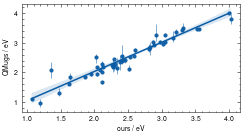

In [84]:
fig, ax = plt.subplots(figsize=(3.5, 2))
p = sns.regplot(gaps[:50], data_grouped_by_smiles.loc[random_smiles]['GFN2_HOMO_LUMO_GAP']['mean'] * 27.2114, ax=ax )
ax.errorbar(gaps[:50], data_grouped_by_smiles.loc[random_smiles]['GFN2_HOMO_LUMO_GAP']['mean'] * 27.2114, 
    [data_grouped_by_smiles.loc[random_smiles]['GFN2_HOMO_LUMO_GAP']['mean'].values * 27.2114 - data_grouped_by_smiles.loc[random_smiles]['GFN2_HOMO_LUMO_GAP']['min'].values * 27.2114,  
    data_grouped_by_smiles.loc[random_smiles]['GFN2_HOMO_LUMO_GAP']['max'].values * 27.2114 - data_grouped_by_smiles.loc[random_smiles]['GFN2_HOMO_LUMO_GAP']['mean'].values * 27.2114],
    
    fmt='o', alpha=0.5, c=plt.gca().lines[-1].get_color())

ax.set_xlabel('ours / eV')
ax.set_ylabel('QMugs / eV')
fig.tight_layout()
fig.savefig('qmugs_vs_rerun.pdf', bbox_inches='tight')

In [90]:
metrics = get_regression_metrics(gaps[:50], data_grouped_by_smiles.loc[random_smiles]['GFN2_HOMO_LUMO_GAP']['mean'] * 27.2114)

for metric, value in metrics.items():
    print(f"{metric} & {value:.2f} \\\\")

r2 & 0.92 \\
max_error & 0.74 \\
mean_absolute_error & 0.12 \\
mean_squared_error & 0.04 \\


In [85]:
data_grouped_by_smiles.loc[random_smiles]['GFN2_HOMO_LUMO_GAP']['mean'].values * 27.2114 - data_grouped_by_smiles.loc[random_smiles]['GFN2_HOMO_LUMO_GAP']['min'].values * 27.2114

array([0.06117758, 0.02412291, 0.08923525, 0.1090134 , 0.28178584,
       0.04216588, 0.04537229, 0.05478562, 0.05195926, 0.04629748,
       0.0851481 , 0.03562063, 0.18812874, 0.08112263, 0.15891185,
       0.01350502, 0.13492138, 0.11442484, 0.19827405, 0.01890285,
       0.00064582, 0.09194188, 0.18692599, 0.06606384, 0.2824625 ,
       0.12331844, 0.19654976, 0.03688233, 0.00683188, 0.08456577,
       0.19505222, 0.10506412, 0.01892462, 0.05049438, 0.10042095,
       0.0388869 , 0.01740804, 0.28858597, 0.00430666, 0.00729084,
       0.07082765, 0.01360479, 0.02873161, 0.02155959, 0.10470312,
       0.05891359, 0.19169434, 0.25101972, 0.00969996, 0.15343783])